In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

base_dir  = 'cats_and_dogs'
# List the directories
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')



Output streaming troncato alle ultime 5000 righe.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and_

In [3]:
# List subdirectories (i.e., classes: 'cats' and 'dogs') in the train directory
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Print the number of images in each directory
print(f"Number of cat images in training set: {len(os.listdir(train_cats_dir))}")
print(f"Number of dog images in training set: {len(os.listdir(train_dogs_dir))}")
print(f"Number of images in validation set: {len(os.listdir(validation_dir))}")
print(f"Number of images in test set: {len(os.listdir(test_dir))}")


Number of cat images in training set: 1000
Number of dog images in training set: 1000
Number of images in validation set: 3
Number of images in test set: 51


In [4]:
# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Sample Cat Images:


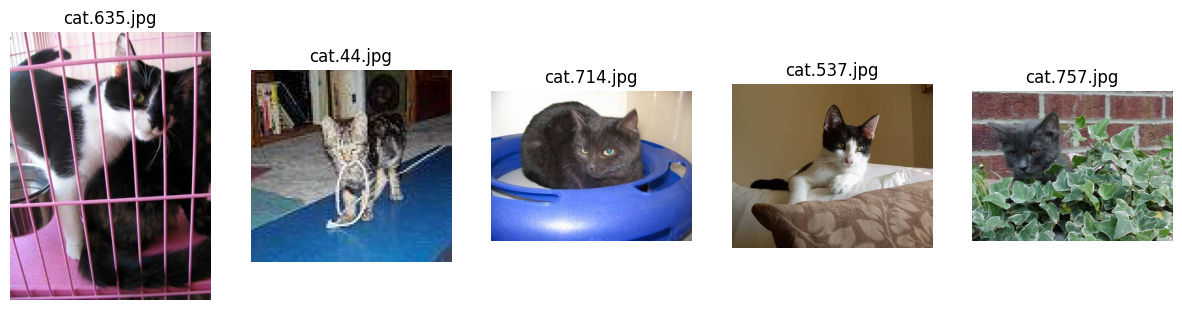

Sample Dog Images:


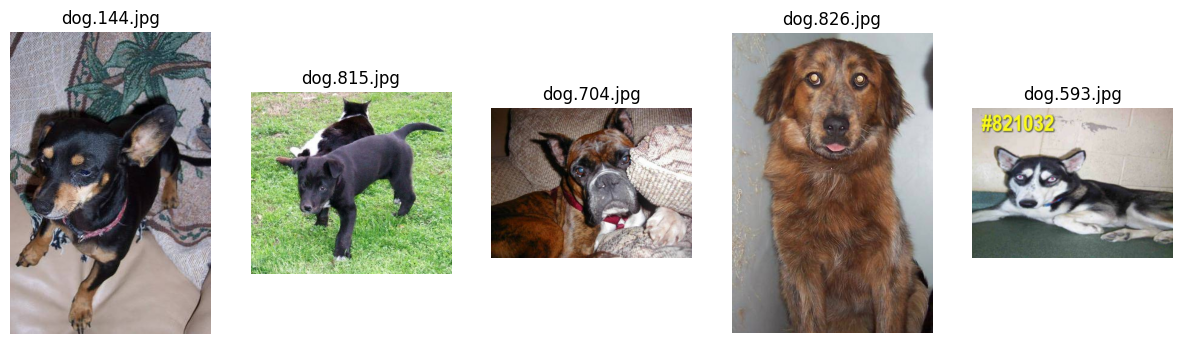

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to plot sample images
def plot_sample_images(dir_path, num_images=5):
    images = os.listdir(dir_path)[:num_images]
    plt.figure(figsize=(15, 15))
    for i, image_name in enumerate(images):
        img_path = os.path.join(dir_path, image_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')
    plt.show()

print("Sample Cat Images:")
plot_sample_images(train_cats_dir)

print("Sample Dog Images:")
plot_sample_images(train_dogs_dir)


In [6]:
from PIL import Image

# Function to get image dimensions
def get_image_dimensions(dir_path, num_images=5):
    image_files = os.listdir(dir_path)[:num_images]
    for image_file in image_files:
        img_path = os.path.join(dir_path, image_file)
        with Image.open(img_path) as img:
            print(f"Image: {image_file}, Size: {img.size}, Mode: {img.mode}")

print("Cat Images Dimensions:")
get_image_dimensions(train_cats_dir)

print("Dog Images Dimensions:")
get_image_dimensions(train_dogs_dir)


Cat Images Dimensions:
Image: cat.635.jpg, Size: (374, 500), Mode: RGB
Image: cat.44.jpg, Size: (107, 102), Mode: RGB
Image: cat.714.jpg, Size: (499, 375), Mode: RGB
Image: cat.537.jpg, Size: (450, 367), Mode: RGB
Image: cat.757.jpg, Size: (499, 375), Mode: RGB
Dog Images Dimensions:
Image: dog.144.jpg, Size: (332, 500), Mode: RGB
Image: dog.815.jpg, Size: (499, 451), Mode: RGB
Image: dog.704.jpg, Size: (499, 375), Mode: RGB
Image: dog.826.jpg, Size: (333, 499), Mode: RGB
Image: dog.593.jpg, Size: (500, 374), Mode: RGB


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image parameters
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Set up image generators
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Flow from directory for training data
train_data_gen = train_image_generator.flow_from_directory(
    'cats_and_dogs/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Flow from directory for validation data
validation_data_gen = validation_image_generator.flow_from_directory(
    'cats_and_dogs/validation',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Flow from directory for test data
test_data_gen  = test_image_generator.flow_from_directory(
                    base_dir,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    classes=['test'],
                    shuffle=False)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


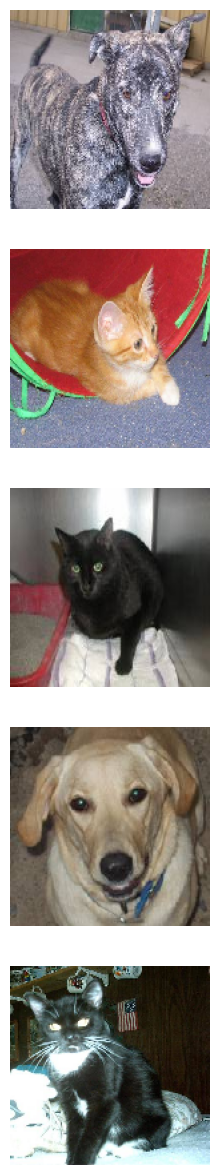

In [9]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Found 2000 images belonging to 2 classes.


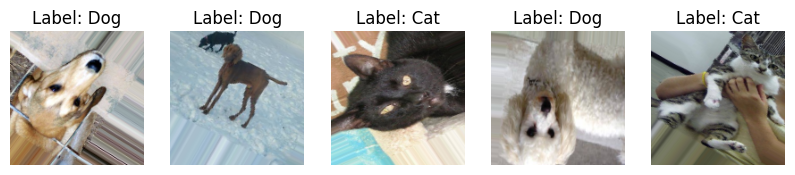

In [31]:
# 5

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image data generator with augmentation
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Get a batch of images from the training data generator
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    shuffle=True
)

# Get a batch of images and their labels
images, labels = next(train_data_gen)

# Plot the augmented images
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.title(f"Label: {'Dog' if labels[i] else 'Cat'}")
    plt.axis('off')
plt.show()


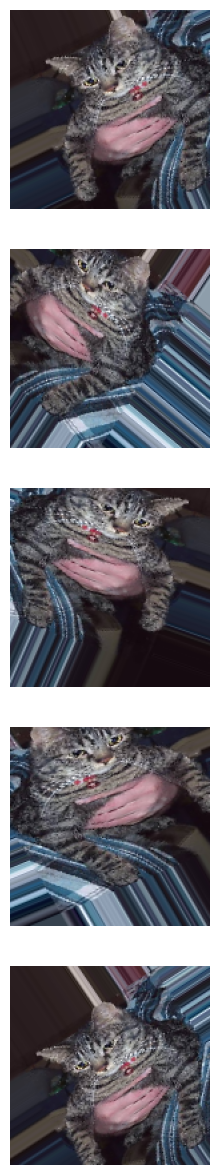

In [11]:
# 6
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [32]:
# 7
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy

# Convolutions
model = Sequential()
# model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64))
# model.add(Dense(1))
model.add(Dense(2))
# model.compile(optimizer='adam', metrics=['accuracy'], loss=BinaryCrossentropy(from_logits=True))
model.compile(optimizer='adam', metrics=['accuracy'], loss=SparseCategoricalCrossentropy(from_logits=True))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │       2,367,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,460,930 (9.39 MB)

 Trainable params: 2,460,930 (9.39 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# 8
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5536 - loss: 1.4956 - val_accuracy: 0.5268 - val_loss: 0.6886
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.5264 - loss: 0.6913 - val_accuracy: 0.5179 - val_loss: 0.6788
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5497 - loss: 0.6845 - val_accuracy: 0.5312 - val_loss: 0.6415
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5245 - loss: 0.7248 - val_accuracy: 0.5446 - val_loss: 0.6847
Epoch 5/15
 3/15 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5747 - loss: 0.6837

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 373ms/step - accuracy: 0.6066 - loss: 0.6786 - val_accuracy: 0.5288 - val_loss: 0.6831
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5695 - loss: 0.6869 - val_accuracy: 0.5670 - val_loss: 0.6767
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5286 - loss: 0.6926 - val_accuracy: 0.5089 - val_loss: 0.6874
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5139 - loss: 0.6823 - val_accuracy: 0.4196 - val_loss: 0.7187
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5744 - loss: 0.6579 - val_accuracy: 0.5580 - val_loss: 0.6471
Epoch 10/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.5434 - loss: 0.6539 - val_accuracy: 0.5481 - val_loss: 0.6523
Epoch 11/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.5160 - loss: 0.6629 - val_accuracy: 0.5893 - val_loss: 0.6407
Epoch 12/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5916 - loss: 0.6421 - val_accuracy: 0.5580 - val_loss: 0.647

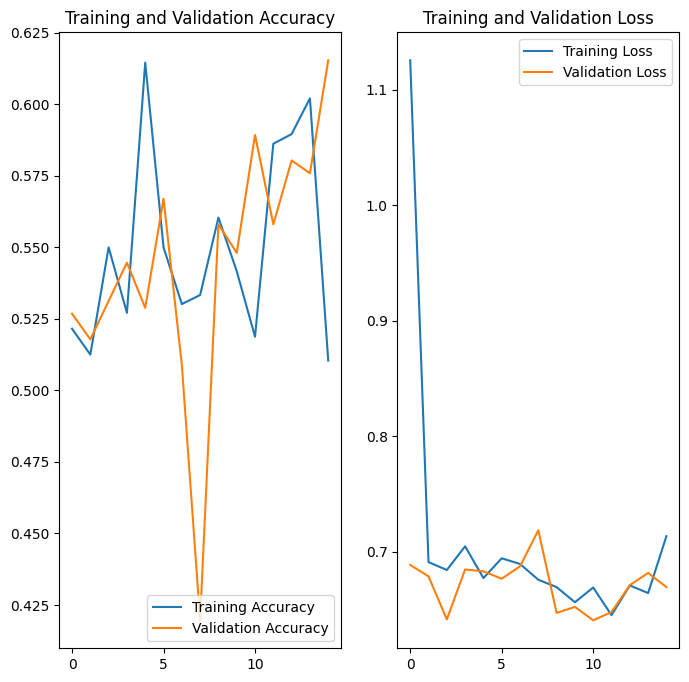

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [37]:
probabilities = np.argmax(model.predict(test_data_gen), axis=-1)
probabilities

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0])

In [38]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 64.0% of the images of cats and dogs.
You passed the challenge!
